# Hospital Readmissions Data Analysis and Recommendations for Reduction

### Background
In October 2012, the US government's Center for Medicare and Medicaid Services (CMS) began reducing Medicare payments for Inpatient Prospective Payment System hospitals with excess readmissions. Excess readmissions are measured by a ratio, by dividing a hospital’s number of “predicted” 30-day readmissions for heart attack, heart failure, and pneumonia by the number that would be “expected,” based on an average hospital with similar patients. A ratio greater than 1 indicates excess readmissions.

### Exercise Directions

In this exercise, you will:
+ critique a preliminary analysis of readmissions data and recommendations (provided below) for reducing the readmissions rate
+ construct a statistically sound analysis and make recommendations of your own 

More instructions provided below. Include your work **in this notebook and submit to your Github account**. 

### Resources
+ Data source: https://data.medicare.gov/Hospital-Compare/Hospital-Readmission-Reduction/9n3s-kdb3
+ More information: http://www.cms.gov/Medicare/medicare-fee-for-service-payment/acuteinpatientPPS/readmissions-reduction-program.html
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bokeh.plotting as bkp
from mpl_toolkits.axes_grid1 import make_axes_locatable

In [2]:
# read in readmissions data provided
hospital_read_df = pd.read_csv('data/cms_hospital_readmissions.csv')

****
## Preliminary Analysis

In [3]:
# deal with missing and inconvenient portions of data 
clean_hospital_read_df = hospital_read_df[hospital_read_df['Number of Discharges'] != 'Not Available']
clean_hospital_read_df.loc[:, 'Number of Discharges'] = clean_hospital_read_df['Number of Discharges'].astype(int)
clean_hospital_read_df = clean_hospital_read_df.sort_values('Number of Discharges')

/home/nervster/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


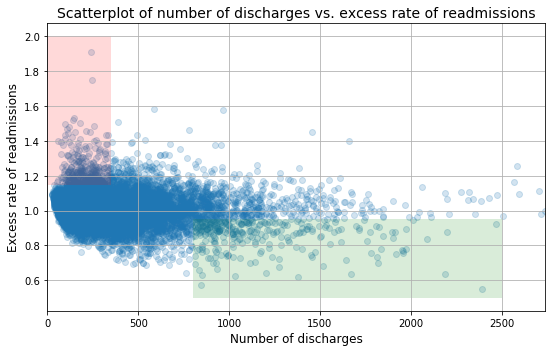

In [4]:
# generate a scatterplot for number of discharges vs. excess rate of readmissions
# lists work better with matplotlib scatterplot function
x = [a for a in clean_hospital_read_df['Number of Discharges'][81:-3]]
y = list(clean_hospital_read_df['Excess Readmission Ratio'][81:-3])

fig, ax = plt.subplots(figsize=(8,5))
ax.scatter(x, y,alpha=0.2)

ax.fill_between([0,350], 1.15, 2, facecolor='red', alpha = .15, interpolate=True)
ax.fill_between([800,2500], .5, .95, facecolor='green', alpha = .15, interpolate=True)

ax.set_xlim([0, max(x)])
ax.set_xlabel('Number of discharges', fontsize=12)
ax.set_ylabel('Excess rate of readmissions', fontsize=12)
ax.set_title('Scatterplot of number of discharges vs. excess rate of readmissions', fontsize=14)

ax.grid(True)
fig.tight_layout()

****

## Preliminary Report

Read the following results/report. While you are reading it, think about if the conclusions are correct, incorrect, misleading or unfounded. Think about what you would change or what additional analyses you would perform.

**A. Initial observations based on the plot above**
+ Overall, rate of readmissions is trending down with increasing number of discharges
+ With lower number of discharges, there is a greater incidence of excess rate of readmissions (area shaded red)
+ With higher number of discharges, there is a greater incidence of lower rates of readmissions (area shaded green) 

**B. Statistics**
+ In hospitals/facilities with number of discharges < 100, mean excess readmission rate is 1.023 and 63% have excess readmission rate greater than 1 
+ In hospitals/facilities with number of discharges > 1000, mean excess readmission rate is 0.978 and 44% have excess readmission rate greater than 1 

**C. Conclusions**
+ There is a significant correlation between hospital capacity (number of discharges) and readmission rates. 
+ Smaller hospitals/facilities may be lacking necessary resources to ensure quality care and prevent complications that lead to readmissions.

**D. Regulatory policy recommendations**
+ Hospitals/facilties with small capacity (< 300) should be required to demonstrate upgraded resource allocation for quality care to continue operation.
+ Directives and incentives should be provided for consolidation of hospitals and facilities to have a smaller number of them with higher capacity and number of discharges.

****
### Exercise

Include your work on the following **in this notebook and submit to your Github account**. 

A. Do you agree with the above analysis and recommendations? Why or why not?
   
B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

   1. Setup an appropriate hypothesis test.
   2. Compute and report the observed significance value (or p-value).
   3. Report statistical significance for $\alpha$ = .01. 
   4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?
   5. Look at the scatterplot above. 
      - What are the advantages and disadvantages of using this plot to convey information?
      - Construct another plot that conveys the same information in a more direct manner.



You can compose in notebook cells using Markdown: 
+ In the control panel at the top, choose Cell > Cell Type > Markdown
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
****

# A. Do you agree with the above analysis and recommendations? Why or why not?

1. They looked at the extreme cases of hospitals (> 1000 and <100). While the conclusion may be describing those 2 groups, they maybe another conclusion for the average hospital. 

2. The conclusion was mainly derived from the graph, which can be telling, but the conclusion should be backed up by hypothesis test. 

3. While I do not disagree with the above analysis and recommendation, I would suggest completing additional statisical analysis before implementing any changes.

# B. Provide support for your arguments and your own recommendations with a statistically sound analysis:

1. Set up appropriate hypothesis test. 
       H0: No Correlation between "Number of Discharge" and "Readmission Rates" 

       Ha: Significant correlation between "Number of Discharge" and "Readmission Rates"
    
2. Compute and report the observed significance value (or p-value).

In [6]:
clean_hospital_read_df.describe()

,Provider Number,Number of Discharges,Footnote,Excess Readmission Ratio,Predicted Readmission Rate,Expected Readmission Rate,Number of Readmissions
count,11578.000000,11578.000000,81.0,11497.000000,11497.000000,11497.000000,11497.000000
mean,257681.537226,362.909397,7.0,1.007504,17.984292,17.865695,63.633731
std,154542.645531,309.176945,0.0,0.091964,5.487651,5.240749,59.540296
min,10001.000000,0.000000,7.0,0.549500,2.700000,3.900000,11.000000
25%,110129.750000,157.000000,7.0,0.952600,16.300000,16.600000,24.000000
50%,250040.000000,280.000000,7.0,1.003500,19.000000,19.000000,45.000000
75%,390041.000000,472.750000,7.0,1.058100,21.500000,21.400000,82.000000
max,670082.000000,6793.000000,7.0,1.909500,32.800000,28.000000,879.000000


In [38]:
clean_hospital_read_df.isnull().sum()
clean_hospital_read_df.columns


Index(['Hospital Name', 'Provider Number', 'State', 'Measure Name',
       'Number of Discharges', 'Footnote', 'Excess Readmission Ratio',
       'Predicted Readmission Rate', 'Expected Readmission Rate',
       'Number of Readmissions', 'Start Date', 'End Date'],
      dtype='object')

In [39]:
df = clean_hospital_read_df.drop(labels = 'Footnote',axis = 1).dropna(axis=0,how='any')
df.isnull().sum()

Hospital Name                 0
Provider Number               0
State                         0
Measure Name                  0
Number of Discharges          0
Excess Readmission Ratio      0
Predicted Readmission Rate    0
Expected Readmission Rate     0
Number of Readmissions        0
Start Date                    0
End Date                      0
dtype: int64

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 11 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null int64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(4), int64(2), object(5)
memory usage: 1.1+ MB


In [45]:
df['Number of Discharges'] = df['Number of Discharges'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11497 entries, 1832 to 13666
Data columns (total 11 columns):
Hospital Name                 11497 non-null object
Provider Number               11497 non-null int64
State                         11497 non-null object
Measure Name                  11497 non-null object
Number of Discharges          11497 non-null float64
Excess Readmission Ratio      11497 non-null float64
Predicted Readmission Rate    11497 non-null float64
Expected Readmission Rate     11497 non-null float64
Number of Readmissions        11497 non-null float64
Start Date                    11497 non-null object
End Date                      11497 non-null object
dtypes: float64(5), int64(1), object(5)
memory usage: 1.1+ MB


In [48]:
df_corr = df[['Number of Discharges','Excess Readmission Ratio']].corr()

In [54]:
r = df_corr.iloc[0,1]
r

-0.09739794351079363

In [59]:
#T-Statistic using the Correlation 
n = len(df['Number of Discharges'])

t_value = r *np.sqrt((n-2)/(1-r**2))
t_value

-10.49238081342337

# 3. Report statistical significance for  α  = .01.

In [60]:
#Compute P Value using 2-Sides P Value
import scipy.stats as stats
p_value = stats.t.sf(np.abs(t_value),df= n-2)* 2

if p_value < .01:
    print("P Value: ", p_value)
    print("Reject H0 hypothesis and accept Ha hypothesis.")
    
else: 
    print("P Value: ", p_value)
    print("Fail to reject H0")

P Value:  1.2225473776733081e-25
Reject H0 hypothesis and accept Ha hypothesis.


# 4. Discuss statistical significance and practical significance. Do they differ here? How does this change your recommendation to the client?

Statistical Significance is when the result is very unlikely to have occurred given the null hypothesis. Practical significance looks at whether the difference is large enough to be of value in a practical sense. In this case, we have rejected the H0 hypothesis of no correlation between the 2 variable, so there is a significant correlation between the 2 variable. In practical significance terms, the R-Squared is 0.0095 or about 1%. This means that number of discharges can be explain with the excess discharge rate with only 1% of variability.

When speaking to my client, I would state that there is a correlation, but it is extremely low. Thus, I would suggest additional tests to find variables with greater impact or correlation to these variables.

# Look at the scatterplot above.
What are the advantages and disadvantages of using this plot to convey information?

    The advantage is that you can see that majority of the data clusters around a single central location. It will help with narrowing your understanding of the sample of hospitals. The disadvantage is that due to clustering, it becomes difficult to see trends or correlation between the variables. You can tell that there is a slight negative correlation, but it is difficult to gauge a sense of how extreme is the correlation.

Construct another plot that conveys the same information in a more direct manner.

I decided to use a jointplot with a parameter reg='kind' because it shows some important information into a single chart. This show exactly where the data is clustered. In addition, it provides the Pearson R Coefficient with the p-value, so I can tell that there is a significant correlation but it is extremely low. 

Overall, it combines the visual with the statistical analysis, so it removes the visual biases we might generate from a graph.

/home/nervster/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/home/nervster/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


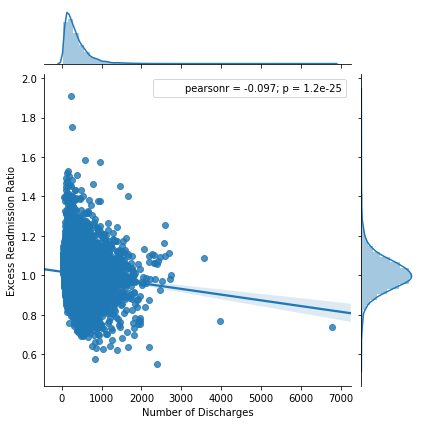

In [66]:
import seaborn as sns
sns.jointplot(df['Number of Discharges'],df['Excess Readmission Ratio'],kind='reg')